Local binary pattern

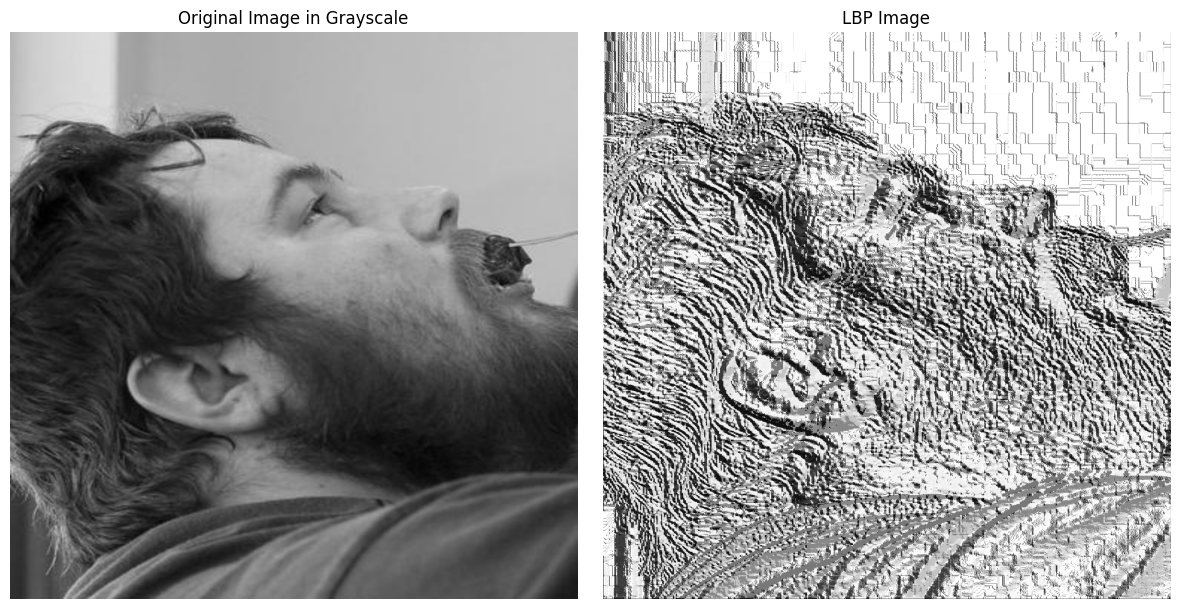

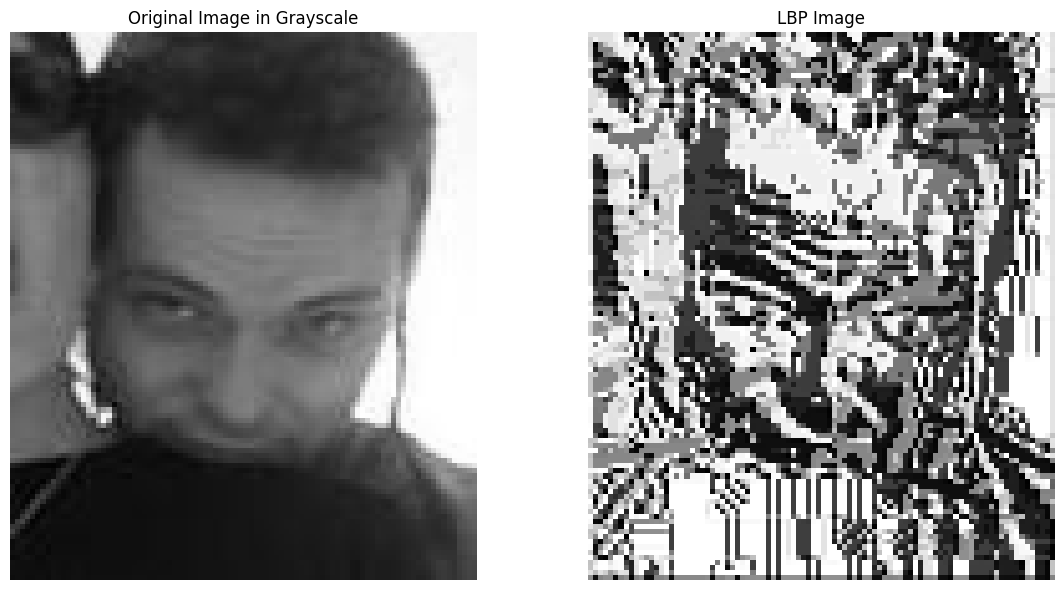

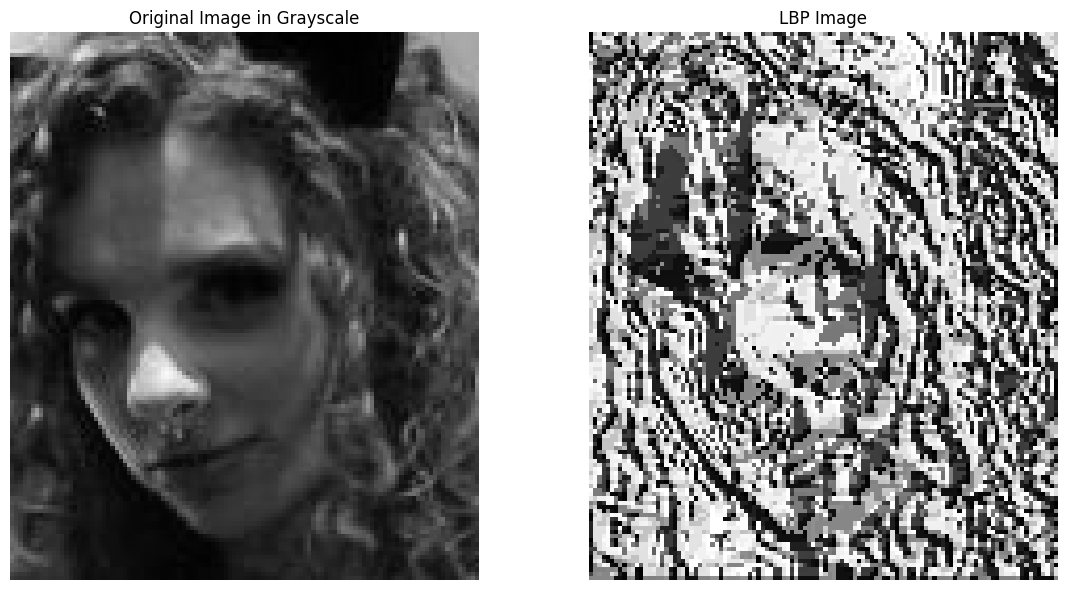

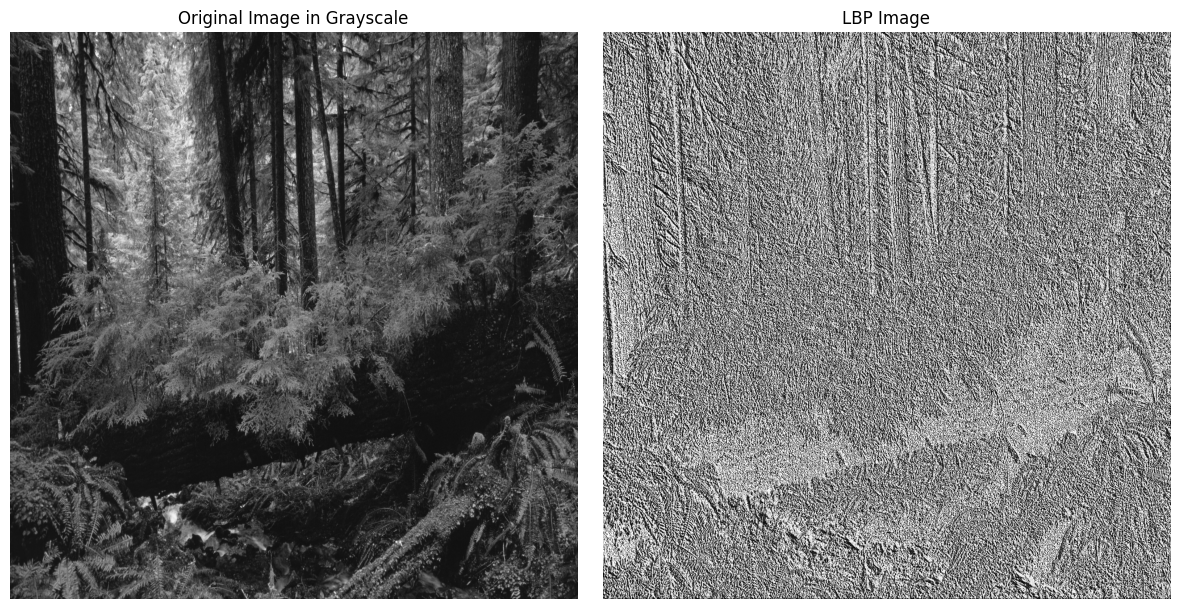

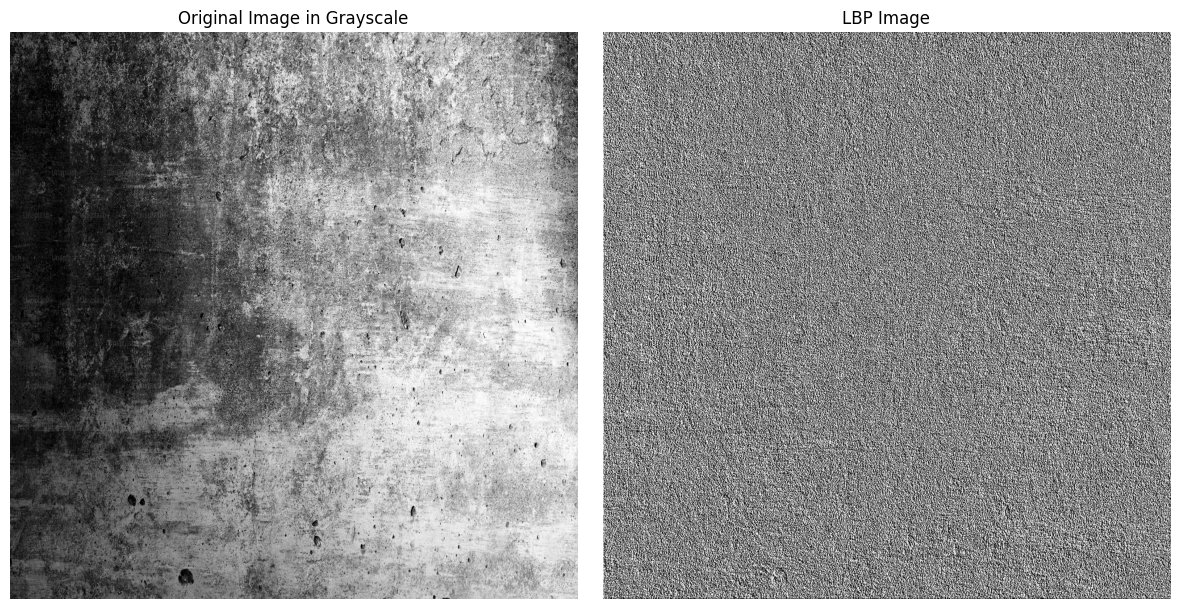

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_and_plot_local_binary_pattern(img_path, new_size: tuple | None = None) -> np.ndarray:
    # This is a modified version of the code given by the lecturer in IT3212 
    def get_pixel(img, center, x, y):
        
        new_value = 0
        
        try:
            # If local neighbourhood pixel 
            # value is greater than or equal
            # to center pixel values then 
            # set it to 1
            if img[x][y] >= center:
                new_value = 1
                
        except:
            # Exception is required when 
            # neighbourhood value of a center
            # pixel value is null i.e. values
            # present at boundaries.
            pass
        
        return new_value
    
    # Function for calculating LBP
    def lbp_calculated_pixel(img, x, y):
    
        center = img[x][y]
    
        val_ar = []
        
        # top_left
        val_ar.append(get_pixel(img, center, x-1, y-1))
        
        # top
        val_ar.append(get_pixel(img, center, x-1, y))
        
        # top_right
        val_ar.append(get_pixel(img, center, x-1, y + 1))
        
        # right
        val_ar.append(get_pixel(img, center, x, y + 1))
        
        # bottom_right
        val_ar.append(get_pixel(img, center, x + 1, y + 1))
        
        # bottom
        val_ar.append(get_pixel(img, center, x + 1, y))
        
        # bottom_left
        val_ar.append(get_pixel(img, center, x + 1, y-1))
        
        # left
        val_ar.append(get_pixel(img, center, x, y-1))
        
        # Now, we need to convert binary
        # values to decimal
        power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    
        val = 0
        
        for i in range(len(val_ar)):
            val += val_ar[i] * power_val[i]
            
        return val
    
    img_bgr = cv2.imread(img_path, 1)

    if new_size is not None:
        img_bgr = cv2.resize(img_bgr, new_size)
    
    height, width, _ = img_bgr.shape
    
    # We need to convert RGB image 
    # into gray one because gray 
    # image has one channel only.
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    # Create a numpy array as 
    # the same height and width 
    # of RGB image
    img_lbp = np.zeros((height, width), np.uint8)
    
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

    # Plotting the original and LBP images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Original image
    axes[0].imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
    axes[0].set_title('Original Image in Grayscale')
    axes[0].axis('off')
    
    # LBP image
    axes[1].imshow(img_lbp, cmap="gray")
    axes[1].set_title('LBP Image')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

    return img_lbp


img_lbp1 = get_and_plot_local_binary_pattern("./cropped_faces/cropped_face_6_1.jpg", (1000, 1000))
img_lbp2 = get_and_plot_local_binary_pattern("./cropped_faces/cropped_face_9_1.jpg")
img_lbp3 = get_and_plot_local_binary_pattern("./cropped_faces/cropped_face_3_1.jpg")
img_lbp4 = get_and_plot_local_binary_pattern("./cropped_faces/forest_img.jpg", (1000, 1000))
img_lbp5 = get_and_plot_local_binary_pattern("./cropped_faces/texture.jpg", (1000, 1000))
# get_and_plot_local_binary_pattern("./cropped_faces/minions.png")

Histogram of images

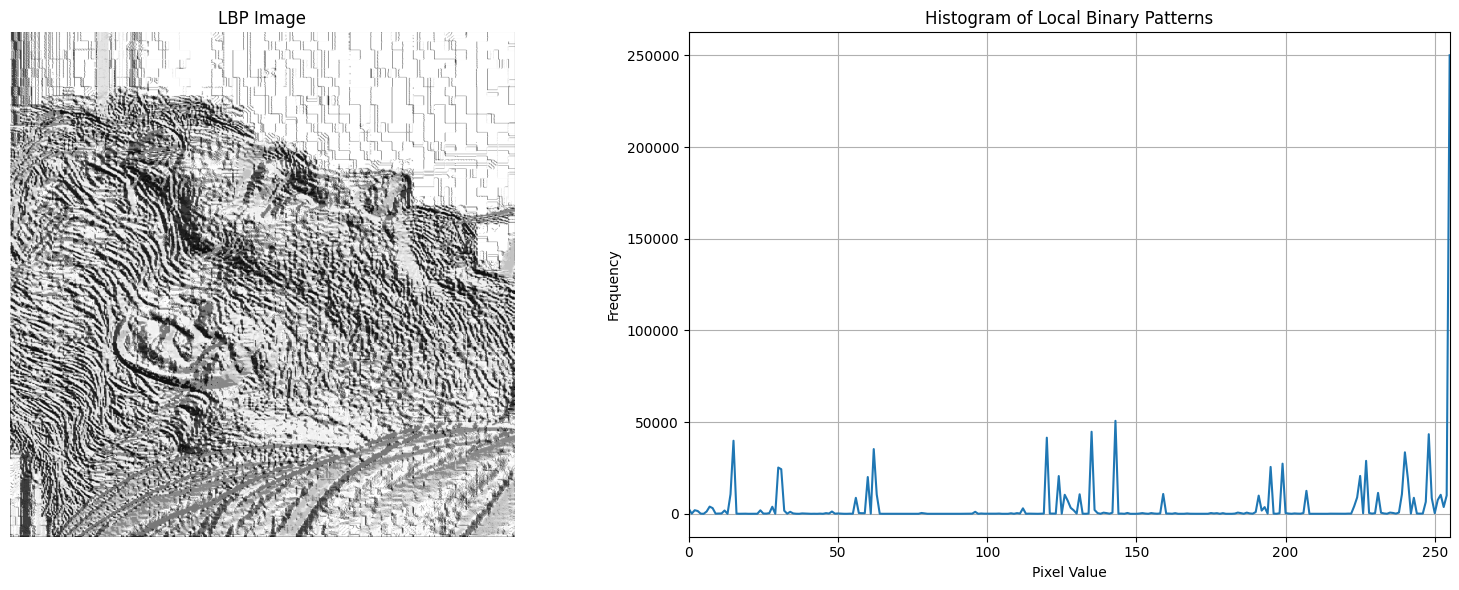

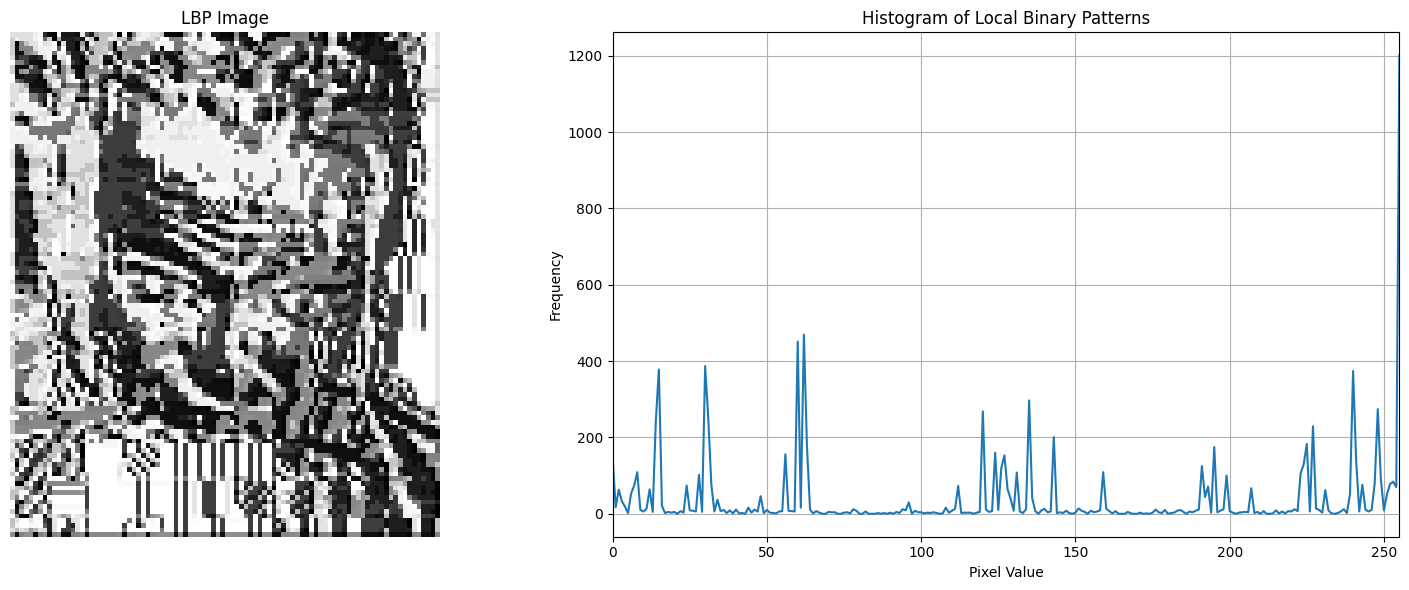

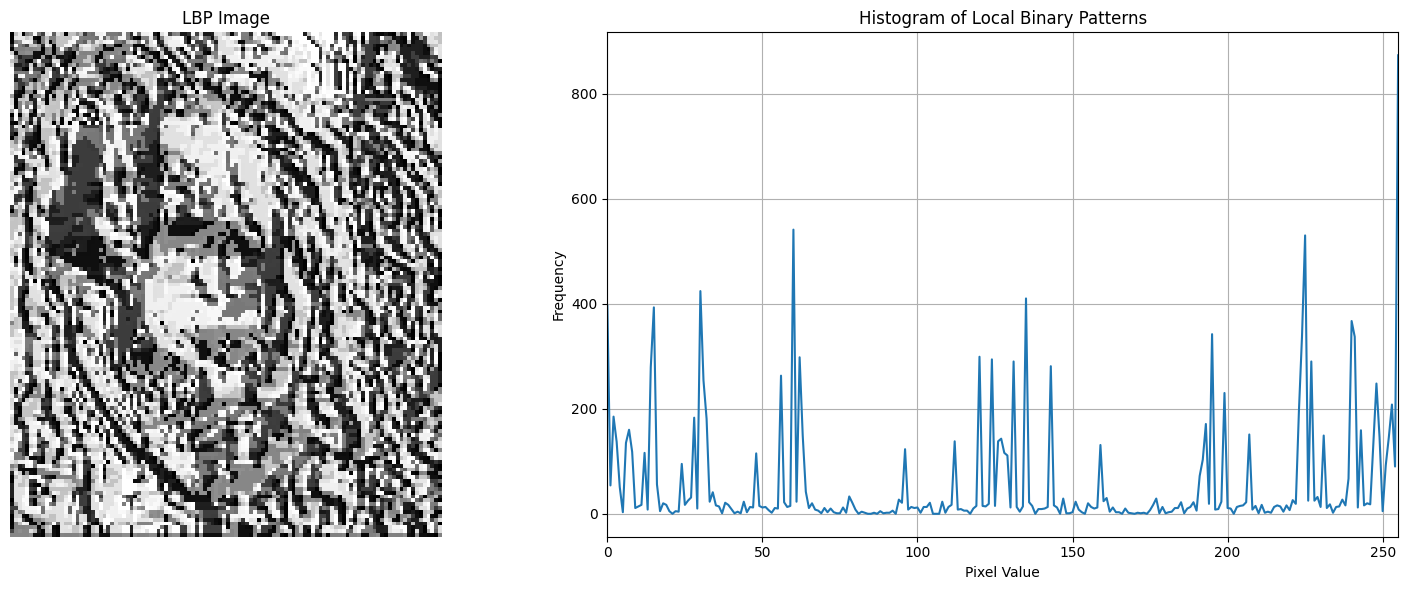

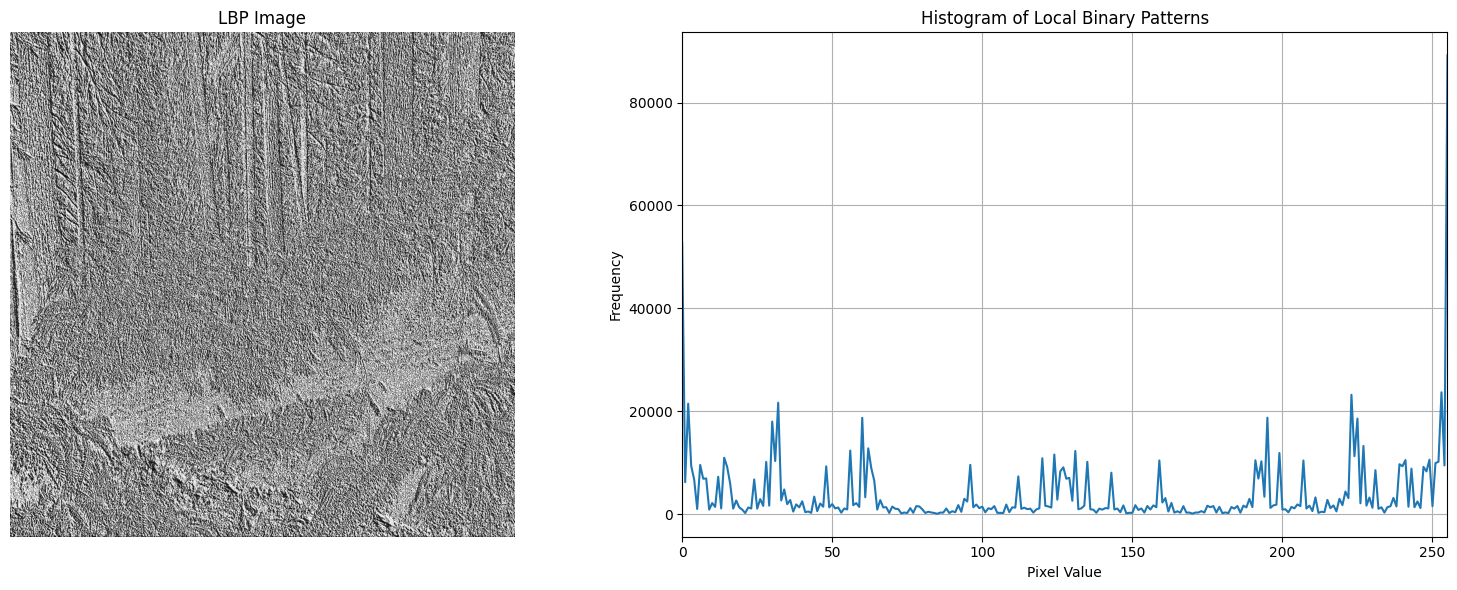

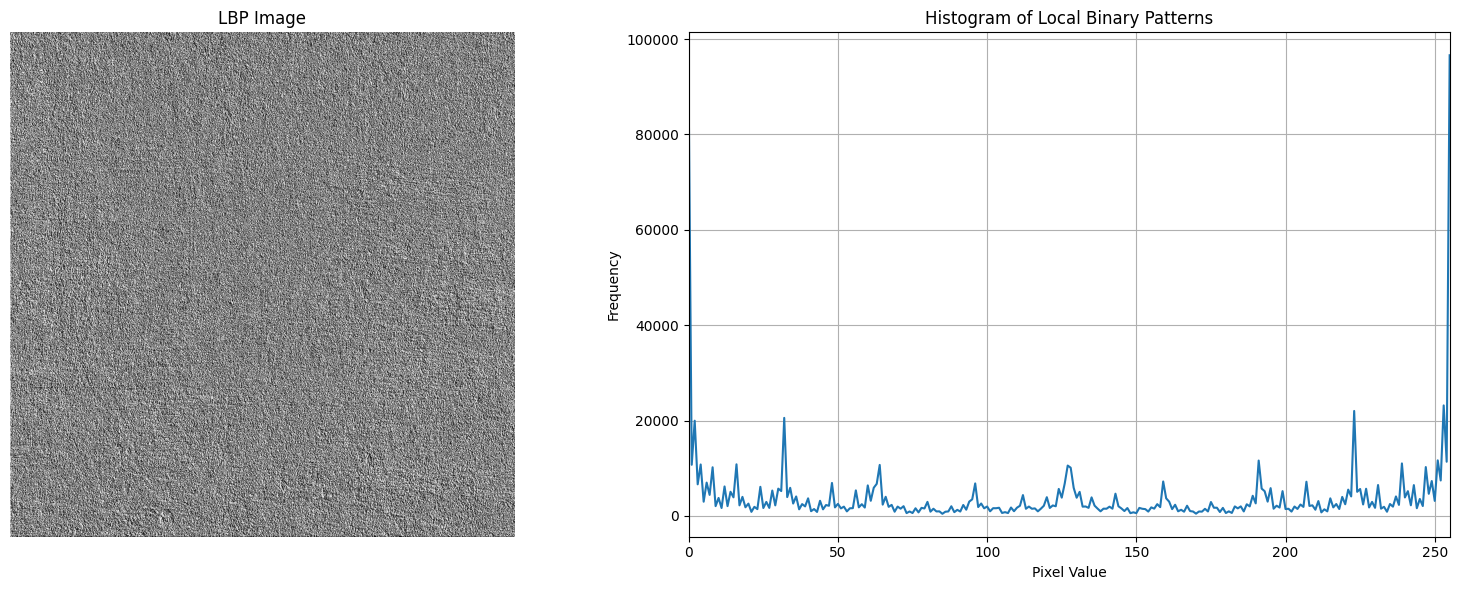

In [2]:
def get_histogram_of_lbp_img(lbp_img: np.ndarray):
    # Base on code provided by the lecturer in IT3212
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # LBP image
    axes[0].imshow(lbp_img, cmap="gray")
    axes[0].set_title('LBP Image')
    axes[0].axis('off')
    
    # Histogram
    hist, bin = np.histogram(lbp_img.ravel(), 256, [0, 255])
    axes[1].set_xlim([0, 255])
    axes[1].plot(hist)
    axes[1].set_title('Histogram of Local Binary Patterns')
    axes[1].set_xlabel('Pixel Value')
    axes[1].set_ylabel('Frequency')
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

get_histogram_of_lbp_img(img_lbp1)
get_histogram_of_lbp_img(img_lbp2)
get_histogram_of_lbp_img(img_lbp3)
get_histogram_of_lbp_img(img_lbp4)
get_histogram_of_lbp_img(img_lbp5)